In [1]:
import yfinance as yf
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import ta as ta
from ta import add_all_ta_features
from ta.utils import dropna
from datetime import datetime

from tsmoothie.utils_func import sim_randomwalk
from tsmoothie.smoother import *

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

In [4]:
ticker ="PETR3.SA"


df = yf.download(ticker)

df = df["2020":]


df = base["2018":]


fig = go.Figure()

fig.add_trace(
    go.Scatter(
        name="Ação",
        x=df.index,
        y=df["Close"],
        line=dict(color='blue', width=1))
)

In [20]:
resultados_roc = ta.momentum.ROCIndicator(df["Close"],12,False)
resultados_roc.roc().dropna(inplace=True)

resultados_roc_sem_null = resultados_roc.roc().dropna()

roc_np = resultados_roc_sem_null.to_numpy()

roc_np = roc_np.reshape(1,len(roc_np))


smoother_roc = GaussianSmoother(n_knots=150, sigma=0.000009)
smoother_roc.smooth(roc_np)
roc_suavizado = smoother_roc.smooth_data[0]


fig = go.Figure()

fig.add_trace(
    go.Scatter(
        name="ROC",
        x=resultados_roc_sem_null.index,
        y=resultados_roc_sem_null,
        line=dict(color='blue', width=1))
)

fig.add_trace(
    go.Scatter(
        x=resultados_roc_sem_null.index,
        y=smoother_roc.smooth_data[0],
        mode='lines',
        name='Gaussian',
        line=dict(color="orange"))
)


fig.add_hline(y=0,line_color="blue",line_width=1, line_dash="dash")
fig.update_layout(paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)')

In [83]:
#TSI

tsi_config=[25,13]
resultados_tsi = ta.momentum.TSIIndicator(df["Close"],tsi_config[0],tsi_config[1],False)

resultados_tsi.tsi().dropna(inplace=True)


#Gaussian TSI
resultados_tsi_sem_null = resultados_tsi.tsi().dropna()

tsi_np = resultados_tsi_sem_null.to_numpy()

tsi_np = tsi_np.reshape(1,len(tsi_np))


smoother_tsi = GaussianSmoother(n_knots=60, sigma=0.0003)
smoother_tsi.smooth(tsi_np)


fig = go.Figure()

fig.add_trace(
    go.Scatter(
        name="TSI",
        x=df.tail(len(resultados_tsi_sem_null)).index,
        y=resultados_tsi_sem_null,
        line=dict(color='blue', width=1))
)

fig.add_trace(
    go.Scatter(
        x=df.tail(len(resultados_tsi_sem_null)).index,
        y=smoother_tsi.smooth_data[0],
        mode='lines',
        name='Gaussian',
        line=dict(color="orange"))
)





fig.add_hline(y=0,line_color="blue",line_width=1, line_dash="dash")
fig.update_layout(paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)')

C:\Users\Facilimpa\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning:

Casting complex values to real discards the imaginary part



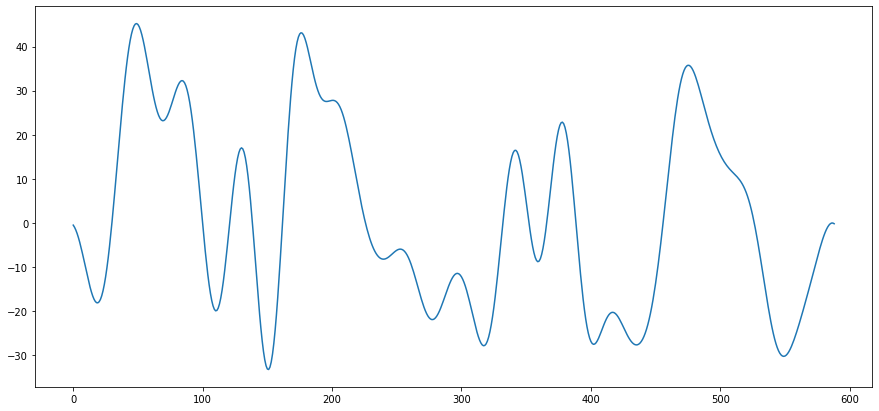

In [11]:
#FFT DO TSI

resultados_tsi_sem_null_df = pd.DataFrame(resultados_tsi_sem_null)

resultados_tsi_sem_null_df['tsi'] = resultados_tsi_sem_null_df['tsi'].apply(lambda x: float(x))

close_fft = np.fft.fft(np.asarray(resultados_tsi_sem_null_df['tsi'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

fft_list = np.asarray(fft_df['fft'].tolist())
fft_list[20:-20] = 0

plt.figure(figsize=(15, 7))
plt.plot(np.fft.ifft(fft_list))
plt.show()

C:\Users\Facilimpa\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning:

Casting complex values to real discards the imaginary part



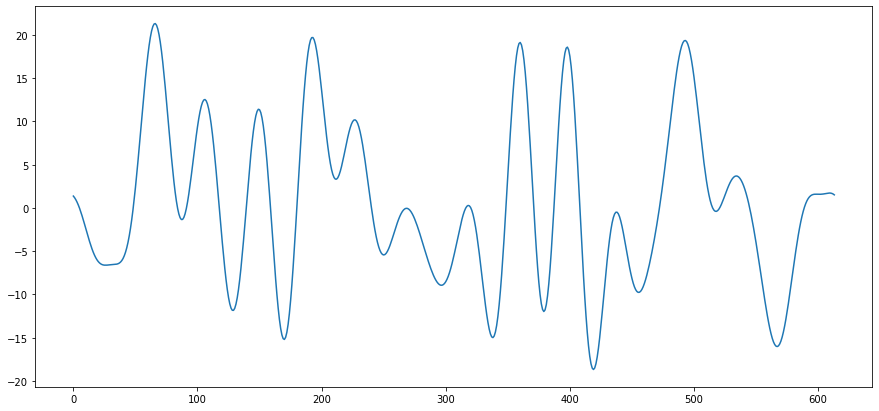

In [12]:
#FFT DO ROC

resultados_roc_sem_null = pd.DataFrame(resultados_roc_sem_null)

resultados_roc_sem_null['roc'] = resultados_roc_sem_null['roc'].apply(lambda x: float(x))

close_fft = np.fft.fft(np.asarray(resultados_roc_sem_null['roc'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

fft_list = np.asarray(fft_df['fft'].tolist())
fft_list[20:-20] = 0

plt.figure(figsize=(15, 7))
plt.plot(np.fft.ifft(fft_list))
plt.show()

In [4]:
ticker ="SOMA3.SA"


df = yf.download(ticker)

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        name="Ação",
        x=df.index,
        y=df["Close"],
        line=dict(color='blue', width=1))
)

[*********************100%***********************]  1 of 1 completed


In [49]:
ticker ="SOMA3.SA"

df = yf.download(ticker)

base = df["2018":]

resultados_mfi = ta.volume.MFIIndicator(base["High"],base["Low"],base["Close"],base["Volume"],14,False)


resultados_mfi_sem_null = resultados_mfi.money_flow_index().dropna()

mfi_np = resultados_mfi_sem_null.to_numpy()

mfi_np = mfi_np.reshape(1,len(mfi_np))


smoother_mfi = GaussianSmoother(n_knots=600, sigma=0.0003)
smoother_mfi.smooth(mfi_np)
mfi_suavizado = smoother_mfi.smooth_data[0]



fig = go.Figure()
fig.add_trace(
    go.Scatter(
        name="Acc",
        x=resultados_mfi.money_flow_index().index,
        y=resultados_mfi.money_flow_index(),
        line=dict(color='blue', width=1))
)

fig.add_trace(
    go.Scatter(
        x=resultados_mfi_sem_null.index,
        y=mfi_suavizado,
        mode='lines',
        name='Gaussian',
        line=dict(color="orange"))
)

fig.show()

[*********************100%***********************]  1 of 1 completed


In [91]:
ticker ="SOMA3.SA"

df = yf.download(ticker)

base = df["2018":]

close_np = base["Close"].values

close_gaussian = close_np.reshape(1,len(close_np))

smoother_mfi = GaussianSmoother(n_knots=80, sigma=0.0009)
smoother_mfi.smooth(close_gaussian)
close_suavizado = smoother_mfi.smooth_data[0]



fig = go.Figure()

fig.add_trace(
    go.Scatter(
        name="Ação",
        x=base.index,
        y=base["Close"],
        line=dict(color='blue', width=1))
)

fig.add_trace(
    go.Scatter(
        name="Ação",
        x=base.index,
        y=close_suavizado,
        line=dict(color='yellow', width=2))
)

[*********************100%***********************]  1 of 1 completed
